In [1]:
import pandas as pd

In [3]:
# Define the path to your CSV file
file_path = 'iris_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
import pandas as pd

#Se Agrupa por la columna 'species' y se calcula el promedio de cada una de las columnas numéricas
mean_values = df.groupby('species').mean()

print(mean_values)


                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

# Añadir box plots para cada variable
fig.add_trace(go.Box(x=df['species'], y=df['sepal_length'], name='Sepal Length'), row=1, col=1)
fig.add_trace(go.Box(x=df['species'], y=df['sepal_width'], name='Sepal Width'), row=1, col=2)
fig.add_trace(go.Box(x=df['species'], y=df['petal_length'], name='Petal Length'), row=2, col=1)
fig.add_trace(go.Box(x=df['species'], y=df['petal_width'], name='Petal Width'), row=2, col=2)

# Actualizar el layout
fig.update_layout(title_text='Box Plots of Iris Dataset Variables by Species', height=800, width=800)

# Mostrar la figura
fig.show()


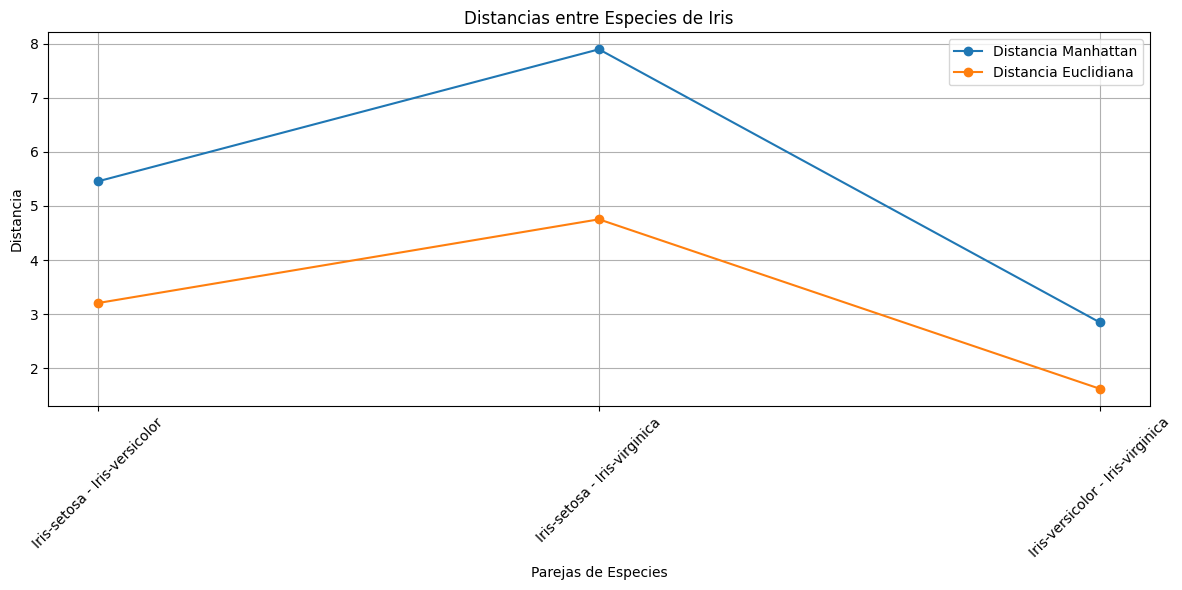

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear DataFrame con los datos de la imagen
data = {
    'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    'sepal_length': [5.006, 5.936, 6.588],
    'sepal_width': [3.418, 2.770, 2.974],
    'petal_length': [1.464, 4.260, 5.552],
    'petal_width': [0.244, 1.326, 2.026]
}

df = pd.DataFrame(data)

# Funciones para calcular distancias
def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Crear una matriz de distancias
species = df['species'].values
features = df.drop(columns='species').values

manhattan_distances = []
euclidean_distances = []
labels = []

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        manhattan_distances.append(manhattan_distance(features[i], features[j]))
        euclidean_distances.append(euclidean_distance(features[i], features[j]))
        labels.append(f'{species[i]} - {species[j]}')

# Graficar las distancias
x = np.arange(len(labels))

plt.figure(figsize=(12, 6))

plt.plot(x, manhattan_distances, label='Distancia Manhattan', marker='o')
plt.plot(x, euclidean_distances, label='Distancia Euclidiana', marker='o')

plt.xticks(x, labels, rotation=45)
plt.xlabel('Parejas de Especies')
plt.ylabel('Distancia')
plt.title('Distancias entre Especies de Iris')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


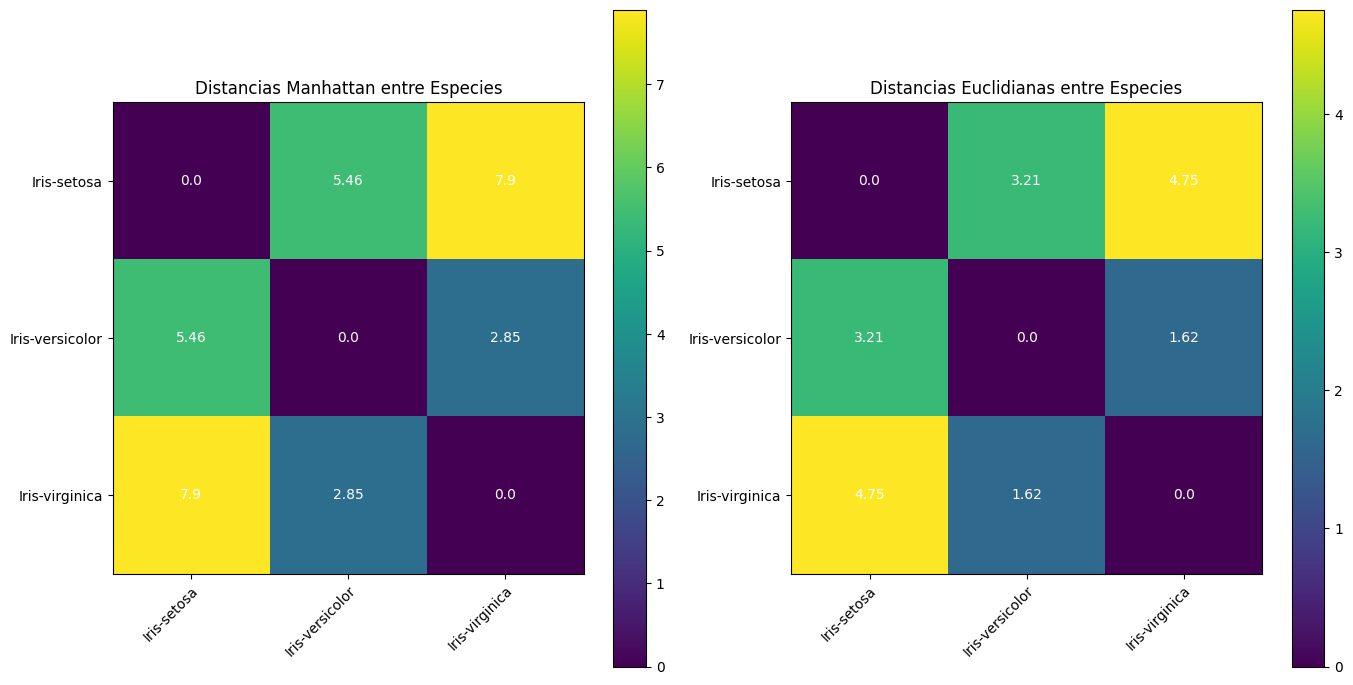

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear DataFrame con los datos de la imagen
data = {
    'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    'sepal_length': [5.006, 5.936, 6.588],
    'sepal_width': [3.418, 2.770, 2.974],
    'petal_length': [1.464, 4.260, 5.552],
    'petal_width': [0.244, 1.326, 2.026]
}

df = pd.DataFrame(data)

# Funciones para calcular distancias
def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Crear una matriz de distancias
species = df['species'].values
features = df.drop(columns='species').values

manhattan_distances = np.zeros((3, 3))
euclidean_distances = np.zeros((3, 3))

for i in range(len(features)):
    for j in range(len(features)):
        manhattan_distances[i, j] = manhattan_distance(features[i], features[j])
        euclidean_distances[i, j] = euclidean_distance(features[i], features[j])

# Graficar las distancias
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Graficar la distancia Manhattan
im1 = axs[0].imshow(manhattan_distances, cmap='viridis')
axs[0].set_xticks(np.arange(len(species)))
axs[0].set_yticks(np.arange(len(species)))
axs[0].set_xticklabels(species)
axs[0].set_yticklabels(species)
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
axs[0].set_title('Distancias Manhattan entre Especies')

# Añadir valores de las distancias en el gráfico Manhattan
for i in range(len(species)):
    for j in range(len(species)):
        text = axs[0].text(j, i, round(manhattan_distances[i, j], 2),
                           ha="center", va="center", color="white")

# Graficar la distancia Euclidiana
im2 = axs[1].imshow(euclidean_distances, cmap='viridis')
axs[1].set_xticks(np.arange(len(species)))
axs[1].set_yticks(np.arange(len(species)))
axs[1].set_xticklabels(species)
axs[1].set_yticklabels(species)
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
axs[1].set_title('Distancias Euclidianas entre Especies')

# Añadir valores de las distancias en el gráfico Euclidiana
for i in range(len(species)):
    for j in range(len(species)):
        text = axs[1].text(j, i, round(euclidean_distances[i, j], 2),
                           ha="center", va="center", color="white")

fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()


In [ ]:
"""Conclusiones

    Similitud entre Especies:
        Iris-versicolor e Iris-virginica son las especies más similares entre sí, ya que tienen las distancias más cortas tanto en la métrica Manhattan (2.85) como en la métrica Euclidiana (1.62).
        Iris-setosa se muestra como la especie más distinta comparada con las otras dos, presentando las mayores distancias, especialmente con Iris-virginica.

    Comparación entre Distancias:
        Las distancias Manhattan tienden a ser mayores que las distancias Euclidianas, 
        lo cual es esperado ya que la distancia Manhattan suma las diferencias absolutas en cada dimensión, 
        mientras que la distancia Euclidiana calcula la raíz cuadrada de la suma de las diferencias al cuadrado, lo que puede suavizar las diferencias.

    Importancia de las Características:
        La mayor diferencia de distancias entre Iris-setosa y las otras especies se debe principalmente a las características más pequeñas de sus pétalos (longitud y anchura), 
        mientras que Iris-versicolor e Iris-virginica tienen valores más cercanos en todas las dimensiones.

    Uso en Modelos de Clasificación:
        Las claras diferencias en las distancias sugieren que un modelo de clasificación puede ser eficiente para diferenciar entre Iris-setosa y las otras dos especies, 
        pero puede encontrar más dificultades para diferenciar entre Iris-versicolor e Iris-virginica debido a su mayor similitud.
        
    Un modelo puede agrupar datos basándose en estas medidas de distancia.
    Es posible agrupar datos basados en medidas de distancia y características de las flores de Iris ya que este tipo de análisis es útil para identificar patrones y similitudes en los datos sin conocer previamente las etiquetas o categorías
        
        
        """



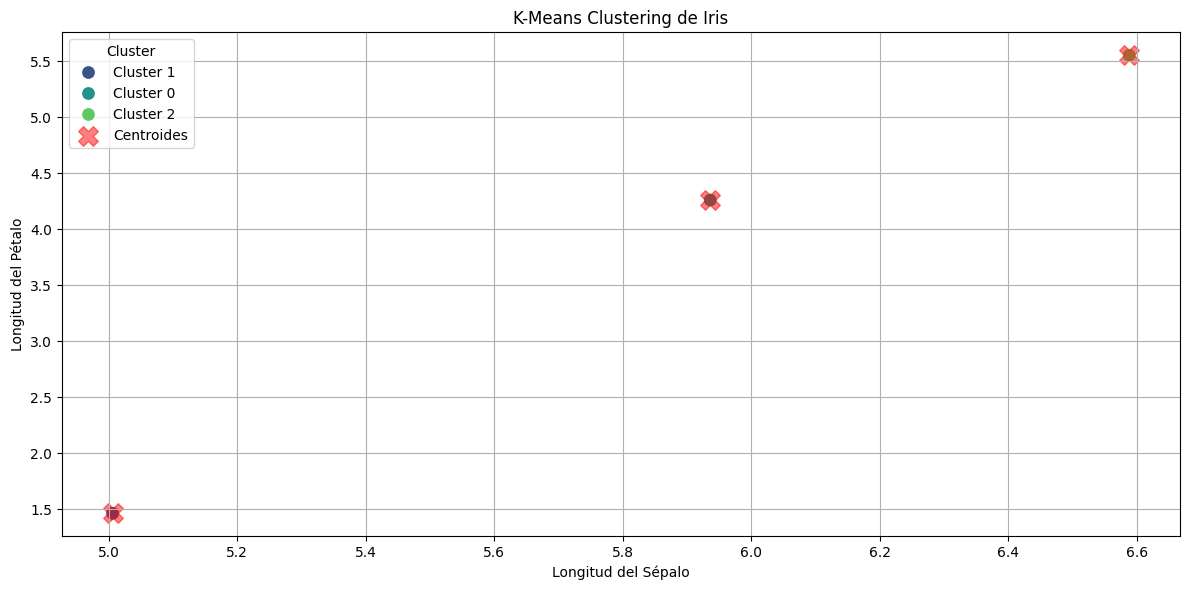

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Crear DataFrame con los datos de la imagen
data = {
    'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    'sepal_length': [5.006, 5.936, 6.588],
    'sepal_width': [3.418, 2.770, 2.974],
    'petal_length': [1.464, 4.260, 5.552],
    'petal_width': [0.244, 1.326, 2.026]
}

df = pd.DataFrame(data)

# Características para clustering
X = df.drop(columns='species').values

# Aplicar K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Mapear los clusters a las especies para visualización
species_map = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}
df['cluster'] = df['cluster'].map(species_map)

# Crear un gráfico de dispersión con las longitudes de los sépalos y los pétalos
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='cluster', palette='viridis', s=100)

# Añadir centroides al gráfico
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, alpha=0.5, marker='X', label='Centroides')

plt.title('K-Means Clustering de Iris')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Longitud del Pétalo')
plt.legend(title='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()



In [20]:
pip install numpy pandas matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
